In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl


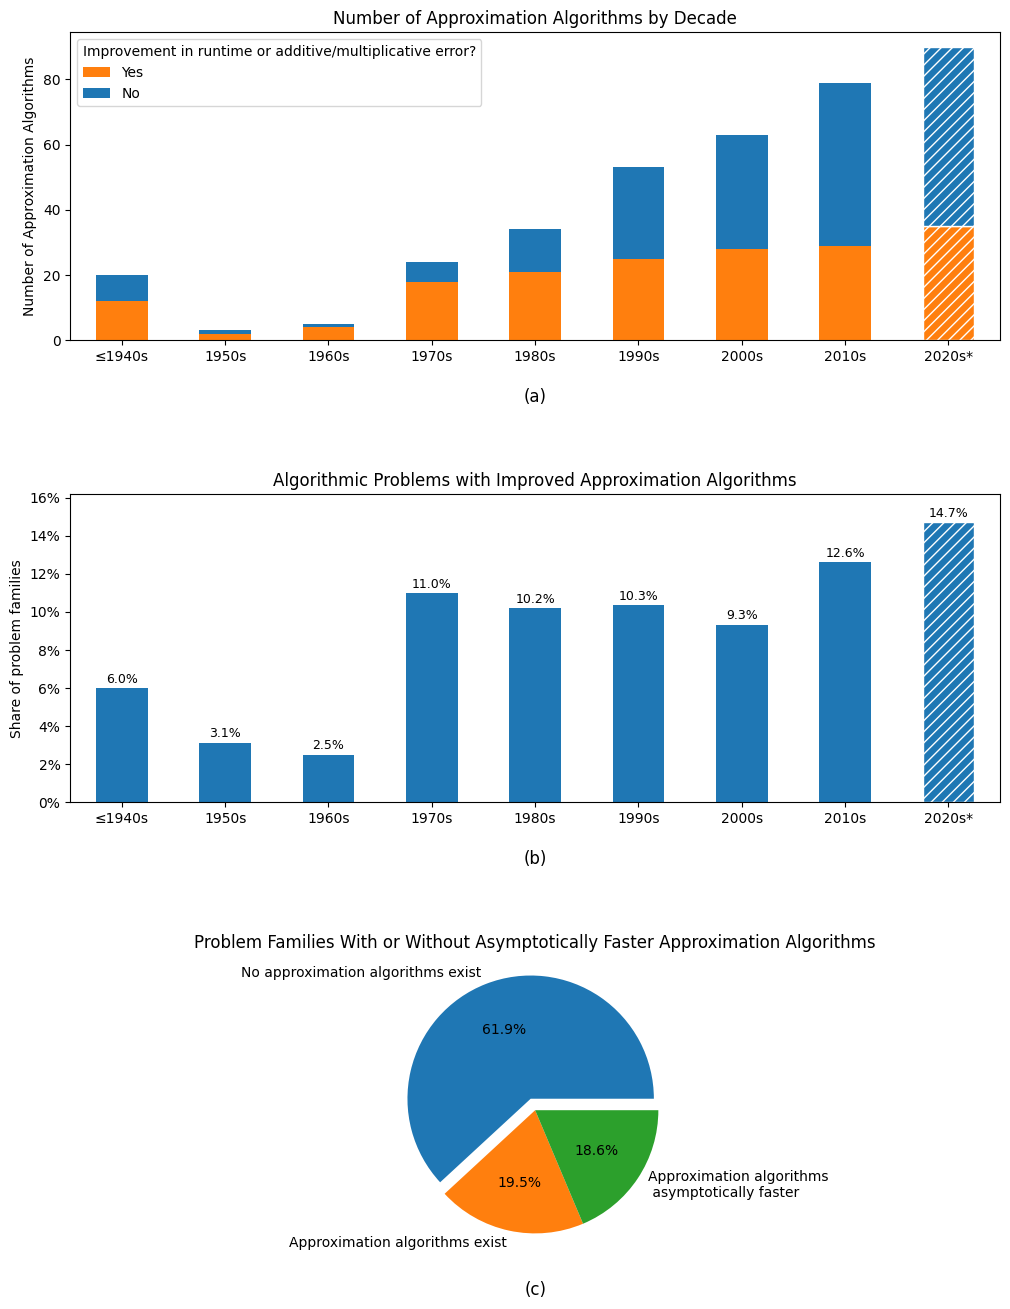

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First plot: Number of Approximation Algorithms by Decade
data1 = pd.read_csv('datasets/improvement-in-runtime-or-additive-multiplicative-error.csv')
data1.loc[data1['Year'] < 1940, 'Year'] = 1940
data1 = data1.groupby([data1['Year'] // 10 * 10, 'Improvement']).size().unstack().fillna(0)
data1[0], data1[1] = data1[1], data1[0]
data1.loc[2020] = data1.loc[2020] * 2.5

# Second plot: Algorithmic Problems with Improved Approximation Algorithms
data2 = pd.read_csv('datasets/algorithmic-problems-with-improved-approximation-algorithms.csv', index_col=0)

# Third plot: Percentage of Problem Families with or without Asymptotically Faster Approximation Algorithms
data3 = pd.read_csv('datasets/percentage-of-problem-families.csv')
data3 = pd.Series(list(data3['0']), index=['Approximation algorithms exist', 'Approximation algorithms\n asymptotically faster', 'No approximation algorithms exist'])
data3 = data3.sort_values(ascending=False)

# Create figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 16))


# First subplot (Bar chart: Number of Approximation Algorithms by Decade)
data1.plot(kind='bar', stacked=True, ax=axs[0], color=['tab:orange', 'tab:blue'])
axs[0].set_xticks(range(len(data1)))
# xtickslabels rotation 0
axs[0].set_xticklabels(['≤1940s'] + ['2020s*' if year == 2020 else str(year) + 's' for year in data1.index[1:]], rotation=0)
# axs[0].set_xticklabels(['≤1940s'] + ['2020s*' if year == 2020 else str(year) + 's' for year in data1.index[1:]])
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of Approximation Algorithms')
axs[0].set_title('Number of Approximation Algorithms by Decade')
axs[0].margins(x=0.01)
axs[0].patches[-1].set_hatch('///')
axs[0].patches[8].set_hatch('///')
axs[0].patches[-1].set_edgecolor('white')
axs[0].patches[8].set_edgecolor('white')
axs[0].legend(['Yes', 'No'], title="Improvement in runtime or additive/multiplicative error?", alignment='left')

# Add label "(a)" below the first plot
axs[0].text(0.5, -0.2, "(a)", transform=axs[0].transAxes, ha="center", fontsize=12)

# Second subplot (Bar chart: Algorithmic Problems with Improved Approximation Algorithms)
data2['Total Percentage'].plot(kind='bar', ax=axs[1])
axs[1].set_xticks(range(len(data2)))
axs[1].set_xticklabels(['≤1940s'] + ['2020s*' if year == 2020 else f'{year:.0f}s' for year in data2.index[1:]], rotation=0)
axs[1].set_xlabel('')
axs[1].set_ylabel('Share of problem families')
axs[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

axs[1].set_title('Algorithmic Problems with Improved Approximation Algorithms')
axs[1].margins(x=0.01, y=0.1)
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
axs[1].patches[-1].set_hatch('///')
axs[1].patches[-1].set_edgecolor('white')

# Add label "(b)" below the second plot
axs[1].text(0.5, -0.2, "(b)", transform=axs[1].transAxes, ha="center", fontsize=12)

# Third subplot (Pie chart: Percentage of Problem Families)
explode = (0.1, 0, 0)
wedges, texts, percs = axs[2].pie(data3, autopct='%1.1f%%', labels=[l for l in data3.index], startangle=0, explode=explode)
axs[2].set_title('Problem Families With or Without Asymptotically Faster Approximation Algorithms')

# Add label "(c)" below the third plot
axs[2].text(0.5, -0.1, "(c)", transform=axs[2].transAxes, ha="center", fontsize=12)

# Adjust the layout
# Increase the gap between plots
plt.subplots_adjust(hspace=0.5)  # Increase the space between the plots (you can adjust the value)

# Adjust the layout and save the figure
plt.savefig('figures/figure 1.png', bbox_inches='tight')
plt.show()


<>:94: SyntaxWarning: invalid escape sequence '\l'
<>:98: SyntaxWarning: invalid escape sequence '\o'
<>:121: SyntaxWarning: invalid escape sequence '\l'
<>:125: SyntaxWarning: invalid escape sequence '\o'
<>:94: SyntaxWarning: invalid escape sequence '\l'
<>:98: SyntaxWarning: invalid escape sequence '\o'
<>:121: SyntaxWarning: invalid escape sequence '\l'
<>:125: SyntaxWarning: invalid escape sequence '\o'
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_88062/1380830603.py:94: SyntaxWarning: invalid escape sequence '\l'
  'Quasilinear [$O(n \log^c(n))$]',
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_88062/1380830603.py:98: SyntaxWarning: invalid escape sequence '\o'
  'Superpolynomial [$\omega(n^c)$]'
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_88062/1380830603.py:121: SyntaxWarning: invalid escape sequence '\l'
  'Quasilinear\n[$O(n \log^c(n))$]',
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_88062/1380830603.py:125: SyntaxWarning

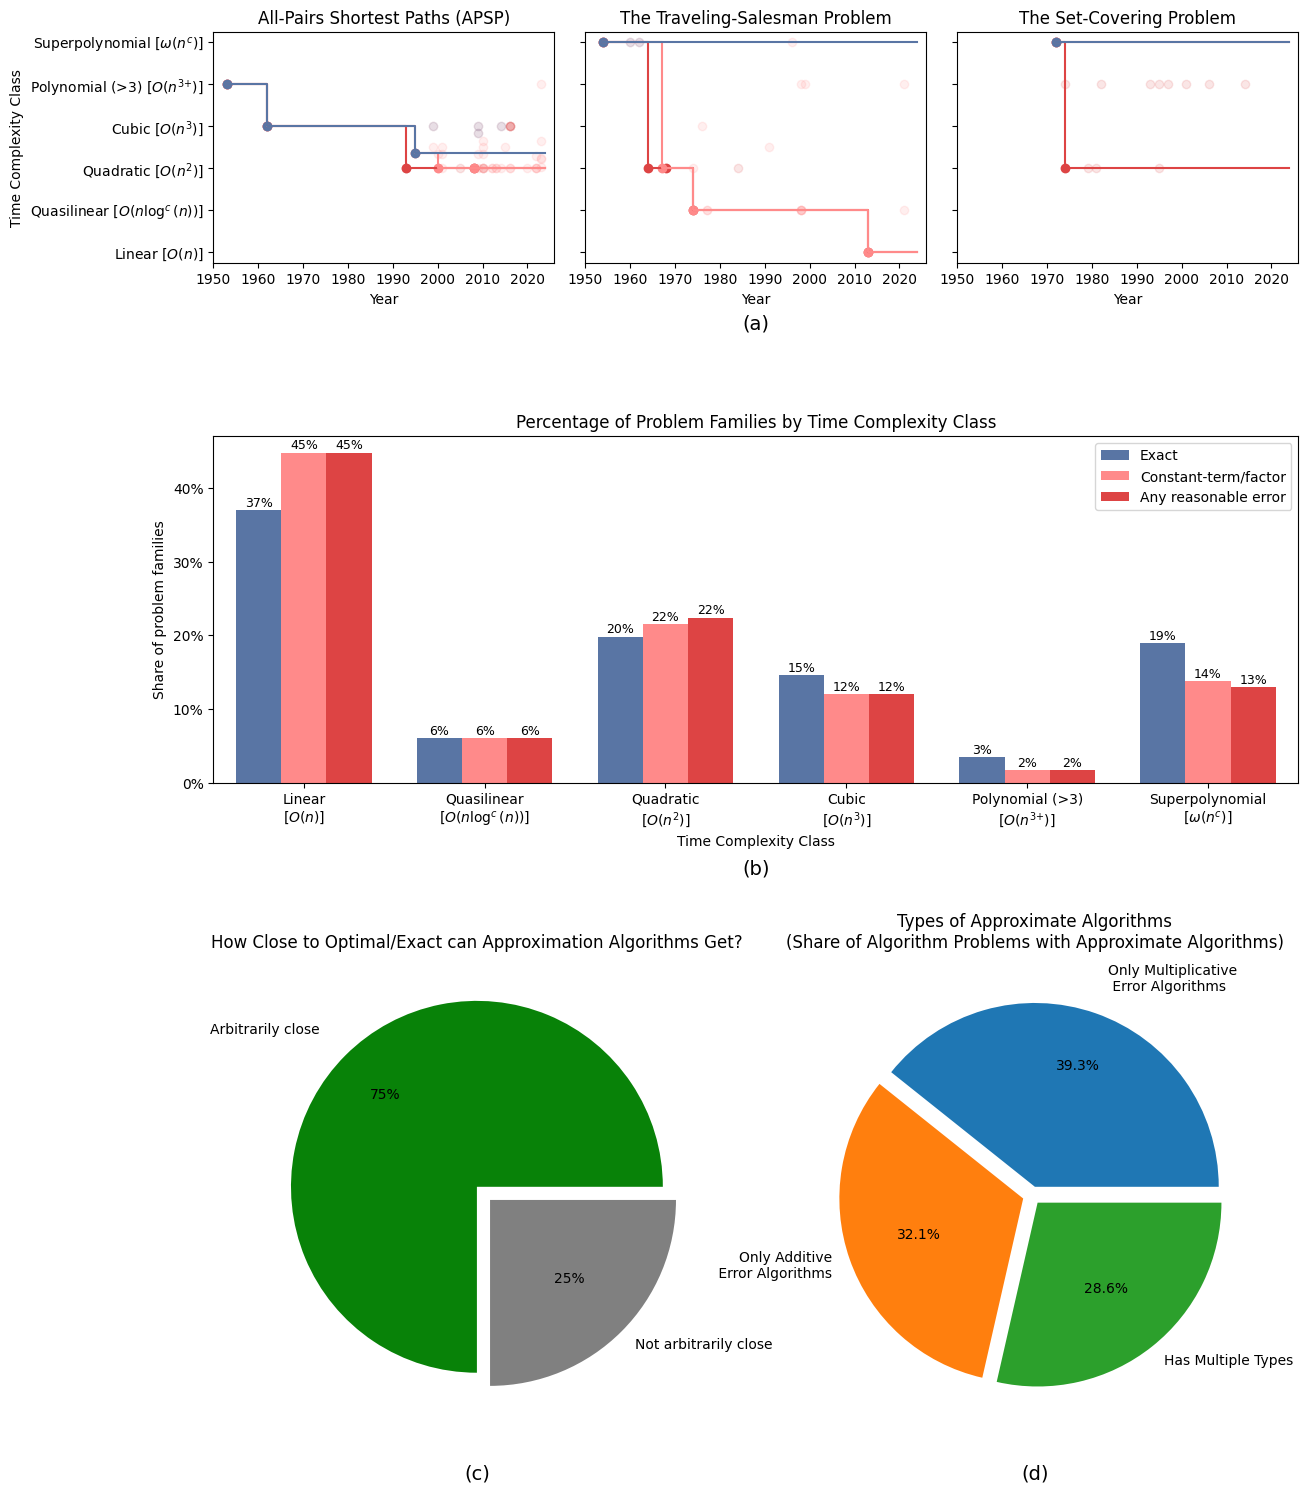

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

# Load your dataset for the first plot
df = pd.read_csv('datasets/algorithm-time-complexity-classes.csv')
families = ["All-Pairs Shortest Paths (APSP)", "The Traveling-Salesman Problem", "The Set-Covering Problem"]

# Define the fill_best function
def fill_best(df, column="Time Complexity Class"):
    best = []
    last_best = 99999
    for index, row in df.iterrows():
        if row[column] < last_best:
            best.append(True)
            last_best = row[column]
        else:
            best.append(False)
    return best

# Create the GridSpec layout: 2 columns, 3 rows
fig = plt.figure(figsize=(14, 18))
gs = GridSpec(3, 6, figure=fig, height_ratios=[1,1.5,2])

# First row: Create individual subplots for each family (spanning 2 columns per family)
for idx, (family, start_col) in enumerate(zip(families, [0, 2, 4])):
    if idx == 0:
        ax = fig.add_subplot(gs[0, start_col:start_col+2])  # First plot without shared y-axis
    else:
        ax = fig.add_subplot(gs[0, start_col:start_col+2], sharey=ax_first)  # Subsequent plots with shared y-axis
    
    # Define ax_first for sharing
    if idx == 0:
        ax_first = ax  # Store the first axis to share the y-axis
    
    # Set y-axis label visibility for non-first plots
    if idx != 0:
        ax.tick_params(labelleft=False)
    
    if idx == 1:
        ax.text(0.5, -0.22, "(a)", transform=ax.transAxes, fontsize=14, va='top', ha='center')

    # ax = fig.add_subplot(gs[0, start_col:start_col+2])  # Each family spans 2 columns
    family_df = df[df['Family Name'] == family]
    family_df['Exact'] = family_df['Approximation Type (additive/multiplicative)'].isnull()
    family_df['Constant Factor'] = (family_df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | \
                                   (family_df['Approximation Factor Class (Add)'].astype(float) <= 2) | \
                                   family_df['Exact']
    family_df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)
    
    exact = family_df[family_df['Exact']]
    constant_factor = family_df[family_df['Constant Factor']]
    approximate = family_df[family_df['Constant Factor'] == False]
    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    family_df['Best'] = fill_best(family_df)

    ax.scatter(approximate['Year'], approximate['Time Complexity Class'],  color='#DD444422')
    ax.scatter(constant_factor['Year'], constant_factor['Time Complexity Class'], color='#ff8a8a22')
    ax.scatter(exact['Year'], exact['Time Complexity Class'], color='#5975A422')

    if len(approximate) > 0:
        best_approximate = family_df[family_df['Best']]
        ax.scatter(best_approximate['Year'], best_approximate['Time Complexity Class'], label='Any reasonable error', color='#DD4444')
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        ax.step(best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='#DD4444')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        ax.scatter(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], label='Constant-term/factor', color='#ff8a8a')
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat([best_constant_factor, last_row], ignore_index=True)
        ax.step(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], where='post', color='#ff8a8a')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        ax.scatter(best_exact['Year'], best_exact['Time Complexity Class'], label='Exact', color='#5975A4')
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        ax.step(best_exact['Year'], best_exact['Time Complexity Class'], where='post', color='#5975A4')

    ax.set_title(family)
    ax.set_xlabel('Year')
    ax.set_xlim(1950, 2026)
    if start_col == 0:
        ax.set_ylabel('Time Complexity Class')
    ax.set_yticks(np.arange(3, 9, 1), [   
        'Linear [$O(n)$]', 
        'Quasilinear [$O(n \log^c(n))$]', 
        'Quadratic [$O(n^2)$]', 
        'Cubic [$O(n^3)$]', 
        'Polynomial (>3) [$O(n^{\\text{3+}})$]', 
        'Superpolynomial [$\omega(n^c)$]'
    ])

# Second plot (grouped bar chart) spanning both columns in the second row
ax2 = fig.add_subplot(gs[1, :])  # This spans both columns
ax2.text(0.5, -0.22, "(b)", transform=ax2.transAxes, fontsize=14, va='top', ha='center')

# Load the data for the second plot
data = pd.read_csv('datasets/time-complexity-classes.csv')
count_exact = data["Exact"]
count_constant_factor = data["Constant-term/factor"]
count_approximate = data["Any reasonable error"]
n_families = data["n_families"][0]

# Plot the grouped bars as percentages
ax2.bar(np.arange(1, 9, 1) - 0.25, count_exact.values / n_families * 100, width=0.25, label='Exact', color='#5975A4')
ax2.bar(np.arange(1, 9, 1), count_constant_factor.values / n_families * 100, width=0.25, label='Constant-term/factor', color='#ff8a8a')
ax2.bar(np.arange(1, 9, 1) + 0.25, count_approximate.values / n_families * 100, width=0.25, label='Any reasonable error', color='#DD4444')

# Set xticks and labels
ax2.set_xticks(np.arange(3, 9, 1))
ax2.set_xticklabels([
    'Linear\n[$O(n)$]', 
    'Quasilinear\n[$O(n \log^c(n))$]', 
    'Quadratic\n[$O(n^2)$]', 
    'Cubic\n[$O(n^3)$]', 
    'Polynomial (>3)\n[$O(n^{\\text{3+}})$]', 
    'Superpolynomial\n[$\omega(n^c)$]'
])
ax2.set_xlabel('Time Complexity Class')
ax2.set_ylabel('Share of problem families')
ax2.set_xlim(2.5, 8.5)

# Add percentage labels on top of the bars
for bar in ax2.patches:
    yval = bar.get_height()
    if yval > 0:
        ax2.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, f'{yval:.0f}%', ha='center', fontsize=9)

ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.legend(['Exact', 'Constant-term/factor', 'Any reasonable error'], loc='upper right')

ax2.set_title('Percentage of Problem Families by Time Complexity Class')

# Third plot (pie chart) in the first column of the third row
ax3 = fig.add_subplot(gs[2, 0:3])
ax3.text(0.5, -0.1, "(c)", transform=ax3.transAxes, fontsize=14, va='top', ha='center')

# Load data for the third plot (How close to optimal)
data3 = pd.read_csv('datasets/how-close-to-optimal-can-approximation-algorithms-get.csv', index_col=0)

# Create the pie chart with exploded slices
explode = (0.1, 0)
colors = ['#088208', 'gray']
wedges, texts, percs = ax3.pie(
    data3['0'],
    autopct='%1.0f%%',
    labels=[l for l in data3.index],
    colors=colors,
    startangle=0,
    explode=explode
)

# Adjust pie chart margins and positions
ax3.margins(0.1)
groups = [[0], [1]]
radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)
ax3.autoscale(True)

# Add a title to the third pie chart
ax3.set_title('How Close to Optimal/Exact can Approximation Algorithms Get?')

# Fourth plot (pie chart) in the second column of the third row
ax4 = fig.add_subplot(gs[2, 3:])
ax4.text(0.5, -0.1, "(d)", transform=ax4.transAxes, fontsize=14, va='top', ha='center')

# Load data for the fourth plot (Types of Approximate Algorithms)
data4 = pd.read_csv('datasets/types-of-approximate-algorithms.csv', index_col=0)

# Create the pie chart with exploded slices
explode = (0.1, 0, 0)
wedges, texts, percs = ax4.pie(
    data4['count'],
    autopct='%1.1f%%',
    labels=[l for l in data4.index],
    startangle=0,
    explode=explode
)

# Adjust pie chart margins and positions
ax4.margins(0.1)
groups = [[0], [1], [2]]
radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)
ax4.autoscale(True)

# if text has 4 words, add a line break after second word
for text in texts:
    if len(text.get_text().split(' ')) == 4:
        split_text = text.get_text().split(' ')
        split_text[1] += '\n'
        
        text.set_text(' '.join(split_text))
# Add a title to the fourth pie chart
ax4.set_title('Types of Approximate Algorithms\n(Share of Algorithm Problems with Approximate Algorithms)', color='black', fontsize=12, ha='center')
# Adjust the overall layout to prevent overlapping
# plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase the space between the plots (you can adjust the value)

# Save and display the combined plot
plt.savefig('figures/figure 2.png', bbox_inches='tight')
plt.show()


/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_88062/615059784.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


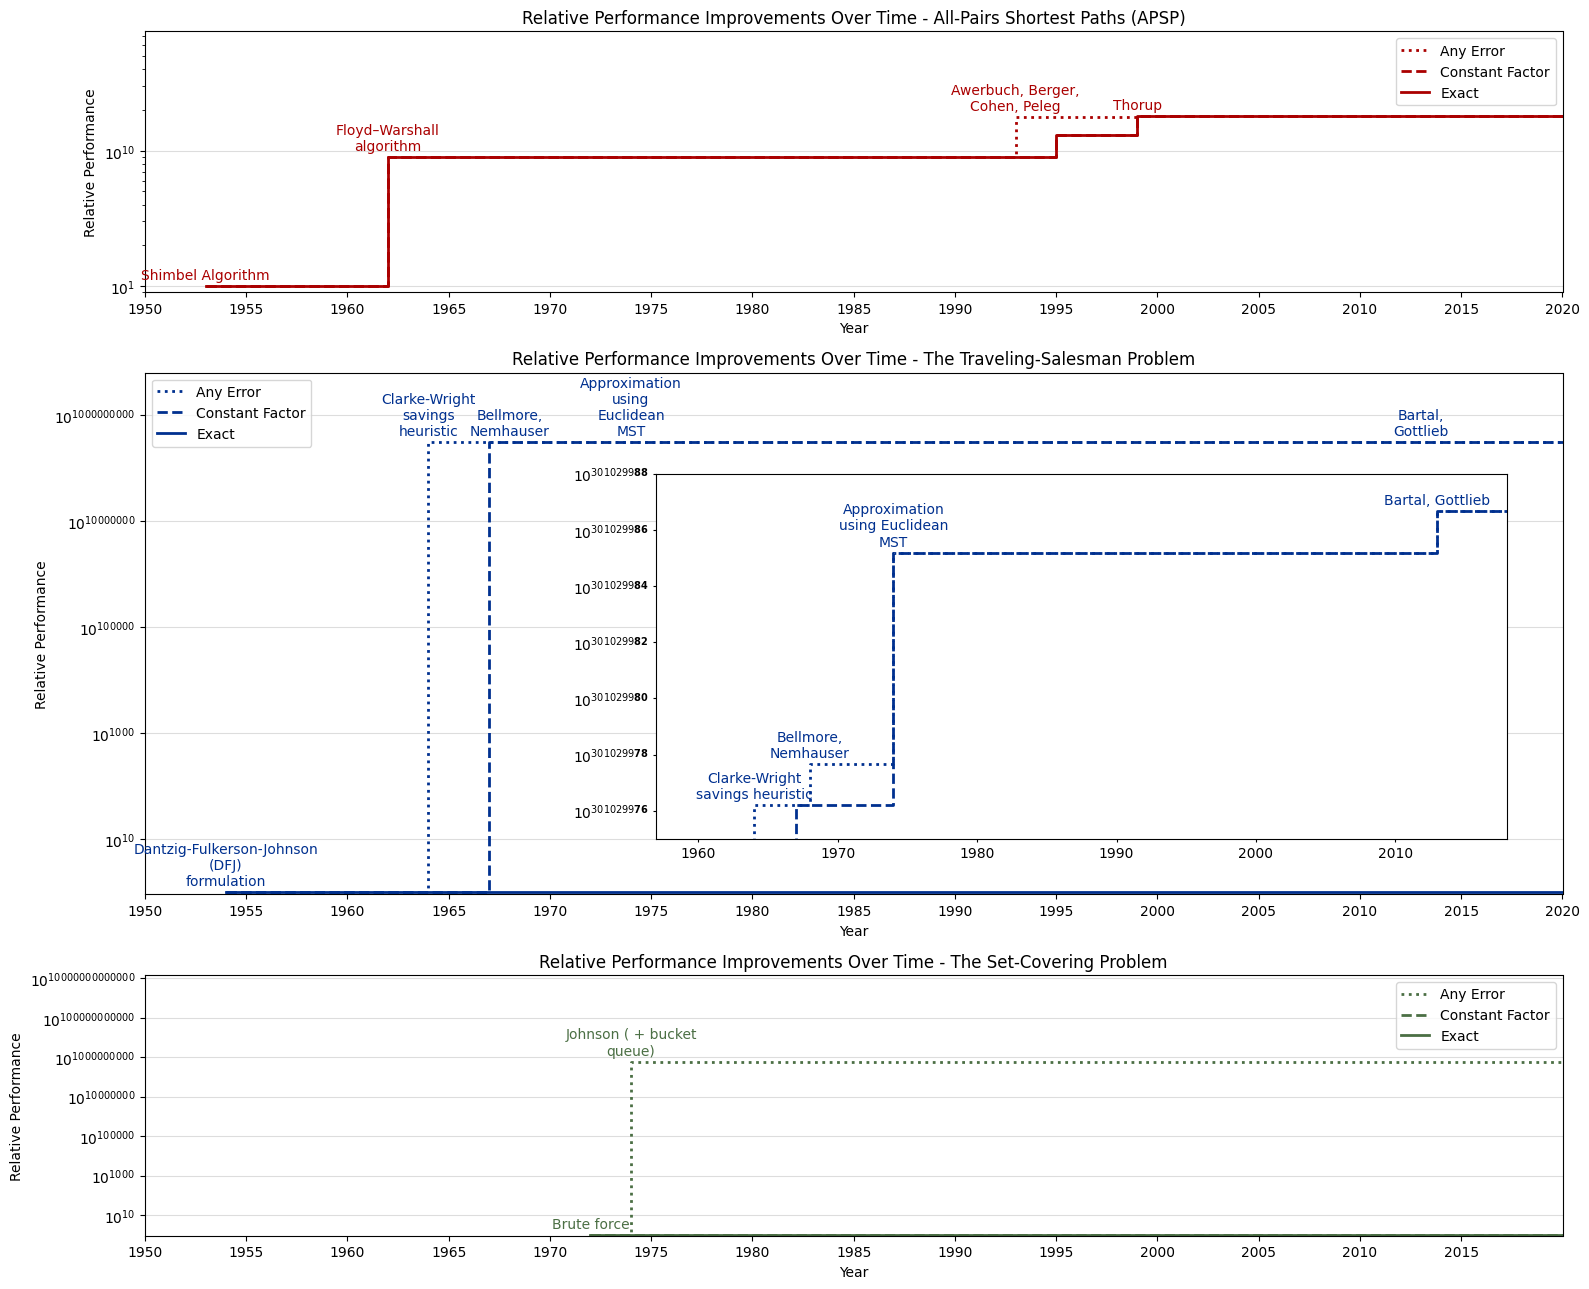

In [86]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Set up the figure with 1 column and 3 rows
fig, axs = plt.subplots(3, 1, figsize=(16, 13), height_ratios=[0.5,1,0.5])

colors = [
    ['#AA0000', '#FF033E', '#fd5c63'],
    ['#00308F', '#00FFFF', '#89CFF0'],
    ['#4B6F44', '#7FFF00', '#4FFFB0']
]

# Plot 1 - All-Pairs Shortest Paths (APSP)
def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix, color, axis):
    axis.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', label=f'Any Error', color=color[0],
              linewidth=2, linestyle='dotted')
    axis.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', label=f'Constant Factor', color=color[0],
              linewidth=2, linestyle='dashed')
    axis.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'Exact', color=color[0], linewidth=2, linestyle='solid')

    for i, row in any_error_filtered.iterrows():
        if i == len(any_error_filtered) - 1:
            continue
        text = axis.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0, 5), ha='center',
                             fontsize=10, color=color[0], wrap=True)
        text._get_wrap_line_width = lambda: 30 if axis == axs[1] else 140.

# Load APSP data
APSP_exact_filtered = pd.read_csv('datasets/APSP_exact_filtered.csv')
APSP_constant_factor_filtered = pd.read_csv('datasets/APSP_constant_factor_filtered.csv')
APSP_any_error_filtered = pd.read_csv('datasets/APSP_any_error_filtered.csv')

# Plot APSP data in the first row
plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, '', colors[0], axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Relative Performance')
axs[0].set_title('Relative Performance Improvements Over Time - All-Pairs Shortest Paths (APSP)')
axs[0].set_xlim(1950, 2020)
axs[0].set_xticks(np.arange(1950, 2021, 5))
axs[0].set_yscale('log')
axs[0].margins(x=0, y=0.5)
axs[0].legend()
axs[0].set_ylim(bottom=0.9)
axs[0].grid(True, which='major', axis='y', linestyle='-', color='#DDD')

# Plot 2 - The Traveling-Salesman Problem (TSP) with Inset
# Load TSP data
TSP_exact_filtered = pd.read_csv('datasets/TSP_exact_filtered.csv')
TSP_constant_factor_filtered = pd.read_csv('datasets/TSP_constant_factor_filtered.csv')
TSP_any_error_filtered = pd.read_csv('datasets/TSP_any_error_filtered.csv')

# Plot TSP data in the second row
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, '', colors[1], axs[1])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Relative Performance')
axs[1].set_title('Relative Performance Improvements Over Time - The Traveling-Salesman Problem')
axs[1].set_xlim(1950, 2020)
axs[1].set_xticks(np.arange(1950, 2021, 5))
axs[1].set_yscale('log')
axs[1].margins(x=0, y=0.5)
axs[1].legend()
axs[1].set_ylim(bottom=0.9, top=6.2e+09)
axs[1].grid(True, which='major', axis='y', linestyle='-', color='#DDD')

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'
def y_format_highlight_last_digits(val, pos):
    # Extract the exponent value from val, and convert it to an integer
    exponent = f'{int(val):d}'
    
    # Make the last two digits bold using LaTeX \mathbf
    if len(exponent) > 2:
        bolded_part = f"\\mathbf{{{exponent[-2:]}}}"
        formatted_exponent = exponent[:-2] + bolded_part
    else:
        formatted_exponent = f"\\mathbf{{{exponent}}}"
    
    # Return the formatted label in LaTeX format
    label = f'$10^{{{formatted_exponent}}}$'
    
    return label
axs[1].yaxis.set_major_formatter(plt.FuncFormatter(y_format))
axs[1].set_axisbelow(True)

# Create the inset plot
ax_inset = inset_axes(axs[1], width="60%", height="70%", loc="lower right", borderpad=4)

# Plot the zoomed-in data on the inset
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP', colors[1], ax_inset)

# Set the limits for the inset plot
ax_inset.set_xlim(1957, 2018)
ax_inset.set_ylim(3.01029975e+08, 3.01029988e+08)
ax_inset.set_yscale('linear')

# Apply the same y-axis format to the inset
ax_inset.yaxis.set_major_formatter(plt.FuncFormatter(y_format_highlight_last_digits))

# Optionally, customize the inset appearance
ax_inset.grid(False)
ax_inset.tick_params(axis='both', which='both', length=2)

# Add zoom indicators between the inset and the main plot
# mark_inset(axs[1], ax_inset, loc1=2, loc2=1, fc="none", ec="0.5", linestyle='--')

# Plot 3 - The Set-Covering Problem (SCP)
# Load SCP data
SCP_exact_filtered = pd.read_csv('datasets/SCP_exact_filtered.csv')
SCP_constant_factor_filtered = pd.read_csv('datasets/SCP_constant_factor_filtered.csv')
SCP_any_error_filtered = pd.read_csv('datasets/SCP_any_error_filtered.csv')

# Plot SCP data in the third row
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP', colors[2], axs[2])
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Relative Performance')
axs[2].set_title('Relative Performance Improvements Over Time - The Set-Covering Problem')
axs[2].set_xlim(1950, 2020)
axs[2].set_xticks(np.arange(1950, 2020, 5))
axs[2].set_yscale('log')
axs[2].margins(x=0, y=0.5)
axs[2].legend()
axs[2].set_ylim(bottom=0.9)
axs[2].grid(True, which='major', axis='y', linestyle='-', color='#DDD')

# Custom y-axis formatter for all plots
for ax in axs:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(y_format))
    ax.set_axisbelow(True)

# Show the combined plot with inset
plt.tight_layout()
plt.savefig('figures/figure 3.png', bbox_inches='tight')

plt.show()
